In [1]:
import pyodbc

# Thông tin kết nối
connection_string = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-778PBH1\HOAIHUESQL;'
    'DATABASE=chotot;'
    'UID=sa;'
    'PWD=123;'
)

# Kết nối đến SQL Server
conn = pyodbc.connect(connection_string)
import pandas as pd
# Lấy dữ liệu từ các bảng
san_pham_query = "SELECT * FROM SanPham;"
cua_hang_query = "SELECT * FROM CuaHang;"
hang_query = "SELECT * FROM Hang;"
dong_may_query = "SELECT * FROM DongMay;"

# Đọc dữ liệu vào DataFrame
df_sanpham = pd.read_sql(san_pham_query, conn)
df_cuahang = pd.read_sql(cua_hang_query, conn)
df_hang = pd.read_sql(hang_query, conn)
df_dongmay = pd.read_sql(dong_may_query, conn)

# Kiểm tra xem dữ liệu có được tải thành công không
print(df_sanpham.head())
#Đóng kết nối
conn.close()


C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_32408\1653319912.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sanpham = pd.read_sql(san_pham_query, conn)


   SanPhamId                                         TenSanPham      Gia  \
0          1  Motorola G Styplus 5G (2023) - Hỗ trợ Bút cản ứng  2750000   
1          2  Xiaomi Redmi K50 Ultra 5G Snap 8+ gen1 Góp Online  4890000   
2          3      Xiaomi Mi 10S Snap 870 Likenew_Trả góp Online  3990000   
3          4   Xiaomi 12 Pro Snap 8 Gen 1 Likenew | Góp Tại Nhà  5890000   
4          5   Xiaomi 12 Pro Snap 8 Gen 1 Likenew | Góp Tại Nhà  5890000   

   DongMayId  HangId  CuaHangId                   TinhTrang ChinhSachBaoHanh  \
0        521       6        527  Đã sử dụng (chưa sửa chữa)     Còn bảo hành   
1        626       9        391                         Mới     Còn bảo hành   
2        487       9        391  Đã sử dụng (chưa sửa chữa)     Còn bảo hành   
3         10       9        391  Đã sử dụng (chưa sửa chữa)     Còn bảo hành   
4         11       9        391  Đã sử dụng (chưa sửa chữa)     Còn bảo hành   

       MauSac                                               Li

C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_32408\1653319912.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cuahang = pd.read_sql(cua_hang_query, conn)
C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_32408\1653319912.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_hang = pd.read_sql(hang_query, conn)
C:\Users\HOAI HUE\AppData\Local\Temp\ipykernel_32408\1653319912.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dongmay = pd.read_sql(dong_may_query, conn)


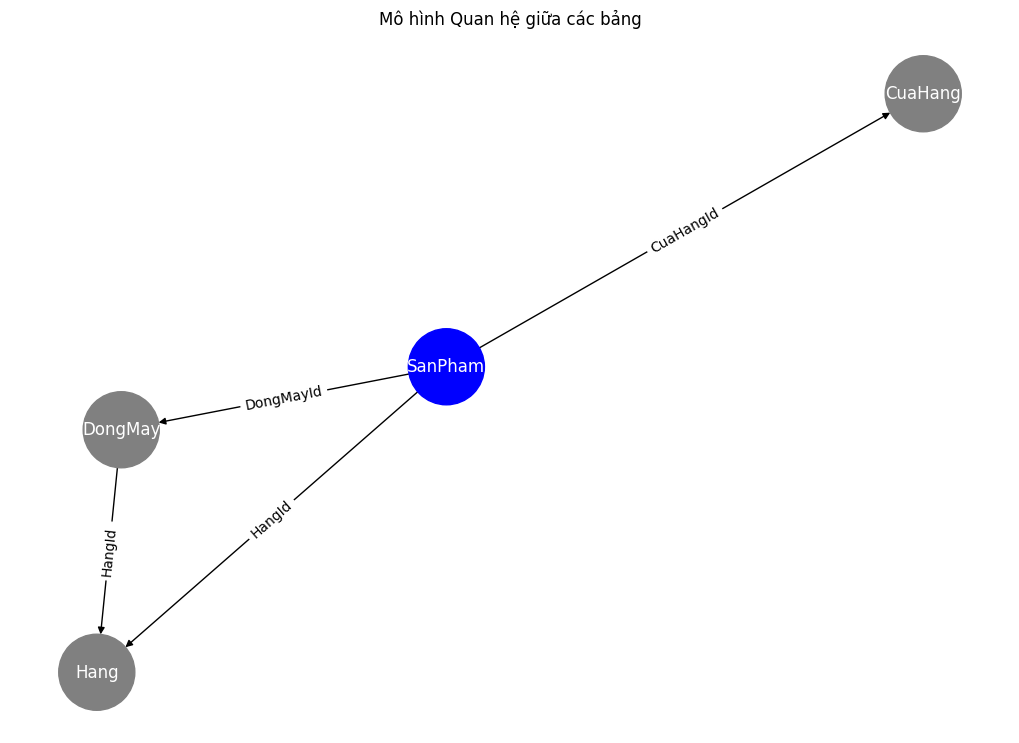

In [22]:
from sqlalchemy import create_engine
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# Tạo một đồ thị để biểu diễn mối quan hệ
G = nx.DiGraph()

# Thêm các nút (tên bảng)
G.add_node("SanPham", color='blue')
G.add_node("DongMay", color='gray')
G.add_node("Hang", color='gray')
G.add_node("CuaHang", color='gray')

# Thêm các cạnh (quan hệ giữa các bảng)
G.add_edge("SanPham", "DongMay", relationship="DongMayId")
G.add_edge("SanPham", "Hang", relationship="HangId")
G.add_edge("SanPham", "CuaHang", relationship="CuaHangId")
G.add_edge("DongMay", "Hang", relationship="HangId")

# Vẽ biểu đồ
pos = nx.spring_layout(G)  # Layout của đồ thị
colors = [G.nodes[node].get('color', 'gray') for node in G.nodes]

plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=3000, font_size=12, font_color='white')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['relationship'] for u, v, d in G.edges(data=True)})
plt.title("Mô hình Quan hệ giữa các bảng")
plt.show()


In [26]:
# Ánh xạ thông tin từ bảng Hang vào bảng SanPham 
for col in df_hang.columns:
    if col != 'HangId':  
        df_sanpham[col] = df_sanpham['HangId'].map(df_hang.set_index('HangId')[col].to_dict())

# Ánh xạ thông tin từ bảng DongMay vào bảng SanPham
for col in df_dongmay.columns:
    if col != 'DongMayId': 
        df_sanpham[col] = df_sanpham['DongMayId'].map(df_dongmay.set_index('DongMayId')[col].to_dict())

# Ánh xạ thông tin từ bảng CuaHang vào bảng SanPham
for col in df_cuahang.columns:
    if col != 'CuaHangId':  
        if col == 'DiemDanhGia':
            df_sanpham['DiemDanhGia_CH'] = df_sanpham['CuaHangId'].map(df_cuahang.set_index('CuaHangId')[col].to_dict())
        elif col == 'SoLuotDanhGia':
            df_sanpham['SoLuotDanhGia_CH'] = df_sanpham['CuaHangId'].map(df_cuahang.set_index('CuaHangId')[col].to_dict())
        else:
            df_sanpham[col] = df_sanpham['CuaHangId'].map(df_cuahang.set_index('CuaHangId')[col].to_dict())


In [5]:
df_sanpham.head()

,SanPhamId,TenSanPham,Gia,DongMayId,HangId,CuaHangId,TinhTrang,ChinhSachBaoHanh,MauSac,Link,TenHang,TenDongMay,TenCuaHang,DiemDanhGia_CH,SoLuotDanhGia_CH
0,1,HONOR 20 LITE 6G/128 ZIN TỐT BỀN GỌN CÓ CH PLAY,1500000.0,393,4,1626,Đã sử dụng (chưa sửa chữa),Còn bảo hành,Vàng hồng,https://www.chotot.com/mua-ban-dien-thoai-quan...,Honor,Honor,NGÔ MINH MOBILE SHOP,4.9,414
1,2,IPhone 7 Plus QT 32G đen zin full chức năng gl,1550000.0,437,8,2422,Đã sử dụng (chưa sửa chữa),Hết bảo hành,Đen,https://www.chotot.com/mua-ban-dien-thoai-quan...,Apple,iPhone 7 plus,sương,0.0,0
2,3,"Samsung A750 2018, ram 6gb, 128gb",990000.0,259,33,24,Đã sử dụng (chưa sửa chữa),Còn bảo hành,Xanh dương,https://www.chotot.com/mua-ban-dien-thoai-quan...,Samsung,Galaxy A7,A LONG nhận thanh toán THẺ TÍN DỤNG,4.6,126
3,4,Oneplus 11 ram 16/256 màu Xanh kèm ốp xịn,8000000.0,539,16,1934,Đã sử dụng (chưa sửa chữa),Hết bảo hành,Xanh dương,https://www.chotot.com/mua-ban-dien-thoai-than...,OnePlus,OnePlus,Nguyen Van Dai,0.0,0
4,5,"Xiaomi redmi 7, ram 3gb, 32gb",690000.0,607,9,24,Đã sử dụng (chưa sửa chữa),Còn bảo hành,Xanh dương,https://www.chotot.com/mua-ban-dien-thoai-quan...,Xiaomi,Redmi 7,A LONG nhận thanh toán THẺ TÍN DỤNG,4.6,126


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Tạo mô tả sản phẩm (sử dụng các cột mô tả sản phẩm)
df_sanpham['description'] = df_sanpham['TenSanPham'] + ' ' + df_sanpham['TenDongMay'] + ' ' + df_sanpham['TenHang'] + ' ' + df_sanpham['TenCuaHang'] + ' ' + df_sanpham['TinhTrang'] + ' ' + df_sanpham['MauSac'] + ' ' + df_sanpham['ChinhSachBaoHanh']


In [28]:
df_sanpham['description'].tail()

13952    iPhone 8 Plus 64G Quốc Tế Đang Dùng Tốt Iphone...
13953    11 128G QTế Mỹ Zin Áp Đang Xài Ngon Full Chức ...
13954    iPhone 11 Trắng 128Gb VN BH T10.2025 Iphone 11...
13955    cây ip7 plus -256gb full zin kv sài gòn Iphone...
13956    🔶 Galaxy Zfold 4 Ram 12|256 Vàng Gold like New...
Name: description, dtype: object

In [29]:
# Áp dụng TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_sanpham['description'])


# Tính toán độ tương đồng cosine giữa các sản phẩm
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [30]:
# Hàm để lấy thông tin từ khách hàng
def get_customer_input():
    print("Nhập thông tin về sản phẩm bạn muốn tìm kiếm:")
    hang = input("Hãng (ví dụ: Samsung, Apple): ")
    dong_may = input("Dòng Máy (ví dụ: Galaxy A7, iPhone 7 plus): ")
    tinhtrang = input("Tình trạng sản phẩm (ví dụ: Đã sử dụng, Mới): ")
    ChinhSachBaoHanh = input("Chính sách bảo hành (ví dụ: Còn bảo hành, Hết bảo hành): ")
    return {
        'Hãng': hang,
        'Dòng Máy': dong_may,
        'Tình trạng': tinhtrang,
        'Chính sách bảo hành': ChinhSachBaoHanh
    }

In [31]:
# Hàm để đề xuất sản phẩm
def recommend_products(customer_input, df_sanpham, tfidf_vectorizer, tfidf_matrix):
    customer_description = (customer_input['Hãng'] + ' ' +
                            customer_input['Dòng Máy'] + ' ' +
                            customer_input['Tình trạng']+ ' ' +
                            customer_input['Chính sách bảo hành']) 
    customer_tfidf = tfidf_vectorizer.transform([customer_description])
    cosine_sim_customer = cosine_similarity(customer_tfidf, tfidf_matrix)
    similar_products_idx = cosine_sim_customer.argsort()[0][::-1]
    
    recommended_products = []
    for idx in similar_products_idx[:5]:  
        recommended_products.append(df_sanpham.iloc[idx][['TenSanPham', 'Gia', 'TinhTrang', 'ChinhSachBaoHanh', 'MauSac', 'TenHang', 'TenDongMay', 'Link']])
    
    return recommended_products

# Thu thập thông tin từ khách hàng
customer_input = get_customer_input()

# Đề xuất sản phẩm dựa trên thông tin khách hàng nhập
recommended_products = recommend_products(customer_input, df_sanpham, tfidf, tfidf_matrix)

# In ra kết quả đề xuất
print("\nSản phẩm đề xuất:")
for product in recommended_products:
    print(product)

Nhập thông tin về sản phẩm bạn muốn tìm kiếm:

Sản phẩm đề xuất:
TenSanPham                                       14 promax 128 có góp
Gia                                                          19200000
TinhTrang                                  Đã sử dụng (chưa sửa chữa)
ChinhSachBaoHanh                                         Còn bảo hành
MauSac                                                            Tím
TenHang                                                         Apple
TenDongMay                                          Iphone 14 pro max
Link                https://www.chotot.com/mua-ban-dien-thoai-huye...
Name: 44, dtype: object
TenSanPham          iphone 14 ProMax 128 Đen Fullbox mới dùng 5 tháng
Gia                                                          15500000
TinhTrang                                  Đã sử dụng (chưa sửa chữa)
ChinhSachBaoHanh                                         Còn bảo hành
MauSac                                                            Đen
T

In [ ]:
import pickle

# Lưu tfidf_matrix vào file
with open('tfidf_matrix.pkl', 'wb') as file:
    pickle.dump(tfidf_matrix, file)
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)   


# Lưu df_sanpham vào file
with open('df_sanpham.pkl', 'wb') as file:  # Đặt đuôi .pkl để định dạng đúng
    pickle.dump(df_sanpham, file)
